## Sinusoid image

In [82]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Import the image as grayscale

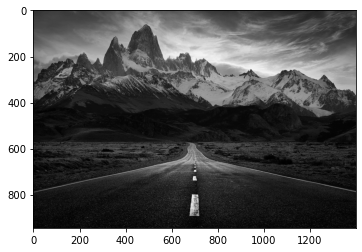

In [83]:
image = cv2.imread('./testimages/landscape.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(np.asarray(image), cmap='gray')

#### Draw the frequency modulation image
The draw_fm_image() function starts at the top left of the output image and calculates by means of the brightness of the input image how high the amplitude needs to be for the next pixel to the right. This is done using the derivative of a normal sine function, multiplying the frequency by a compare value (compval), which corresponds to a value of the input pixel on a line.

In [84]:
def draw_fm_image(blurred_image, lines, minfreq, maxfreq, inverted, amplitudescalar=1):
    """Returns the a set of points for a blurred image that respond to the frequency modulated image"""
    if inverted:
        image_used = blurred_image
    else:
        image_used = 255 - blurred_image
    graph_points = np.zeros([lines, image_used.shape[1]])
    interval = image_used.shape[0]/(lines+1)
    amplitude = amplitudescalar * interval/2

    for linenumber in range(lines):
        y_local_zero = int(interval + linenumber*interval)
        prevpos = 0
        for xval in range(image_used.shape[1]):
            compval = image_used[y_local_zero, xval]/255
            freq = minfreq + maxfreq*compval
            newpos = prevpos + round(amplitude*np.cos(xval*freq))
            yval = y_local_zero + newpos
            graph_points[linenumber, xval] = yval
    return graph_points
    

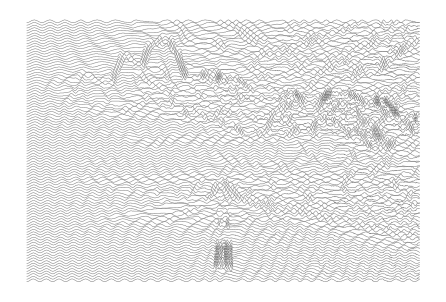

In [85]:
lines = 100 # Amount of lines in the image
maxfreq = 1/10 # Maximum frequency that can be drawn
minfreq = 1/25 # Minimum frequency that can be drawn
inverted = False # Invert the image

# Blur parameters
blocksizex = 30
blocksizey = 30

# First blur the image to get rid of outliers
image_blurred = cv2.blur(image, ksize=[blocksizex, blocksizey])

# Generate the image
graph_points = draw_fm_image(image_blurred, lines, minfreq, maxfreq, inverted)

# Plot the image
fig = plt.figure()
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
for values in graph_points:
    plt.plot(-values, color='gray', linewidth=0.5)

###### Save the picture

In [86]:
fig.savefig('./outputimages/Current_export_fm.png', dpi=1000)

#### Draw the amplitude modulation image
The draw_am_image() function works roughly the same as the draw_fm_image(), but instead of altering the frequency, the amplitude gets altered.

In [87]:
def draw_am_image(image, lines, minamp, amplitudescalar, freq, inverted):
    """Returns the a set of points for an image that went through the 'frequency modulation filter'"""
    if inverted:
        image_used = image
    else:
        image_used = 255 - image
    graph_points = np.zeros([lines, image_used.shape[1]])
    interval = image_used.shape[0]/(lines+1)

    for linenumber in range(lines):
        y_local_zero = int(interval + linenumber*interval)
        prevpos = 0
        for xval in range(image_used.shape[1]):
            compval = image_used[y_local_zero, xval]/255
            amplitude = (interval/2)*(minamp + amplitudescalar*compval)
            newpos = prevpos + round(amplitude*np.cos(xval*freq))
            yval = y_local_zero + newpos
            graph_points[linenumber, xval] = yval
    return graph_points

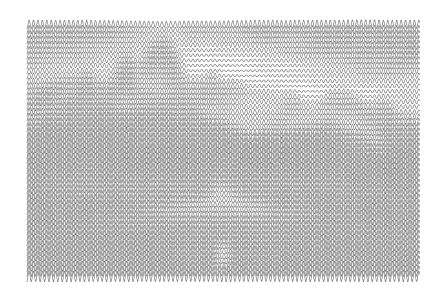

In [88]:
lines = 50 # Amount of lines in the image
minamp = 1/10 # Minimum amplitude
amplitudescalar = 2 # How big the amplitude scales when at max value
freq = 75 # Frequency of signals. Note that changing frequency can alter the image a lot due to aliasing.
inverted = False # Invert the image

# Blur parameters
blocksizex = 50
blocksizey = 50

# First blur the image to get rid of outliers
image_blurred = cv2.blur(image, ksize=[blocksizex, blocksizey])

# Generate the image
graph_points = draw_am_image(image_blurred, lines, minamp, amplitudescalar, freq, inverted)

# Plot the image
fig = plt.figure()
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
for values in graph_points:
    plt.plot(-values, color='gray', linewidth=0.7)

###### Save the image

In [89]:
fig.savefig('./outputimages/Current_export_am.png', dpi=1000)